### Quantum Cryptography - Day12
# Multi Party Quantum Key Agreement(MP-QKA)

Quantum Key agreement (QKA) is  a cryptographic procol where **multiple participants jointly establish a shared screte kry**,ensuring that **no single party can fully determine te final key alone**.

In this notebook , we focus on a **3-party Quantum Key Agrement Protocol** using qunatum circuit and entanglement .Unlike Quantum Key Distribution(QKD) ,QKA Emphasizes **fairness**  and **collective control** over the key.In this we will learn:
- How a **3-party Quantum circuit** is constructed
- How **Shared entanglement(GHZ State)** enables multiparty correlation
- How participants contribute to a **Consensus Key**
- How the **final key is extracted**
- How to perform **failure and attack analysis**

## Import Required Libraries

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot  as plt
from qiskit.visualization import plot_histogram

## Why Multi-Party Entanglement?
In a 3-party Quantum Key Agreement:
- participants :**Alice,Bob,Charlie**
- All parties must **contribute equality** to the key
- **GHZ(Greenberger-Horne-Zeilinger) state** is used

#### Why GHZ State?
- Creates **global correlations**
- Measurement outcome are **interdependent**
- Any disturbance is easily detectable 

GHZ State : 
$$|GHZ\rangle =\frac {(|000\rangle + |111\rangle)}{\sqrt{2}} $$

## Step 1 : Create 3-Party Quantum Circuit
In this step shared entanglement to all parties .after preforming this we get :
- All qubit become **correlated**
- Measurement of one qubit determine other
- No party owns the key individually 

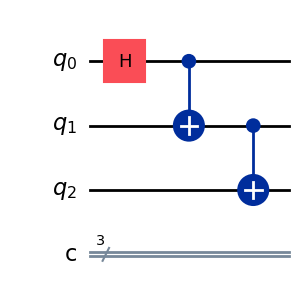

In [2]:
qc=QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.draw('mpl')

## Step 2 : Participants Encode their Secrete Bits
here,perform indidividual contribution of participants.Each aprty **modifies the shared quantum state**.Ensure faireness - no single party dominates the key.after performing this :
- the final measurement reflects **combined contribution**
- changing one bit alters the final shared key



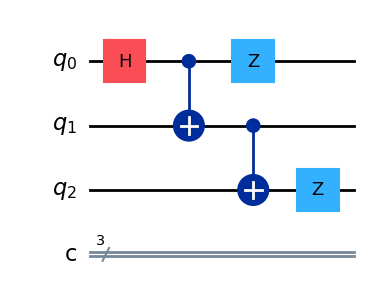

In [3]:
## secret contribution(example)
alice_bit=1
bob_bit=0
charlies_bit=1

#Encoding contributions using Z gates
if alice_bit==1:
    qc.z(0)
if bob_bit==1:
    qc.z(1)
if charlies_bit==1:
    qc.z(2)

qc.draw('mpl')


## Step 3 : Measurement and Consensus Key Extraction
here perform Consensus Key extraction.
### How is the Key Derived?
- All parties measure their qubits
- XOR(parity) of results froms the shared key

#### Example:
If result=111,
 final key = $$ 1\oplus 1\oplus 1 = 1 $$

 #### Effect :
 - Everyone computes the **same key inpendently**
 - No classical communication of the key itself

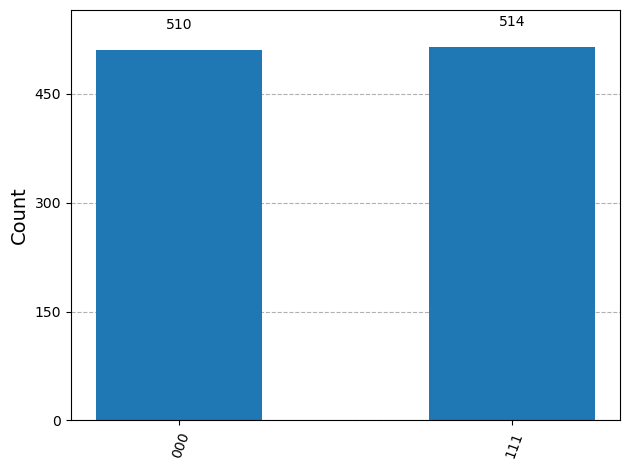

In [4]:
qc.measure([0,1,2],[0,1,2])
sim=AerSimulator()
result=sim.run(qc,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

 The measurement histrogram shows near 50% counts for state 000 and 50% counts for 111.This results confirms that  the three qubit are in GHZ entangked state,producing strong multi party correlation where all participants obtained identical meausrement outcomes. such balnaced readomness ensures that no sinlge part can predetermine the key , satsfying the fairness requirement of Quantum Ket Agreement.

 From cryptographi perspective ,the absence of other state indicates no detectable evedropping or protocol failure, and all three parties can independently derive the smae shared key bit, validating the correctness and security of the multi-party qunatum key agreement protocol.

## Step 4 : Failure and Attack analysis

#### 1.Evesdropping
- Any measurement by Eve collapse the GHZ state
- results in **unexpected correlation**
- detected via error rate increase

#### 2. Dishonest Participants
- if one party manipulatesmeasurement
- Other parties will detect in consistency

#### 3.Noise And decoherence
- real Quantum hardware introduce noise
- can cause incorrect key bits
- Mitigated using error correction and repetition

#### 4. Security outcome
- Confidentiality
- Fairness
- Tamper Detection

This Protocol demonstrate how quantum mechanic ensure **trust,fairness and securty** beyond classical cryptography.

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day12_Multi_Party_Quantum_Key_Agreement.ipynb

**Date created**: 04-February-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>